In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
df = pd.read_csv('./pbrun-nvsmi.csv')


In [27]:
f_vmstat = open('./pbrun-vmstat.txt')
lines = f_vmstat.readlines()
usr = []
sys = []
iow = []
timestamps = []
i=0
for line in lines:
    if line.find('procs') != -1 or line.find('UTC') != -1:
        continue
    i = i + 1
    timestamps.append(i)
    usr.append(int(line.split()[12]))
    sys.append(int(line.split()[13]))
    iow.append(int(line.split()[15]))
    
print(usr)

[1, 0, 0, 0, 0, 0, 0, 0, 5, 17, 16, 13, 9, 7, 7, 8, 7, 7, 8, 9, 8, 9, 8, 8, 9, 9, 9, 18, 20, 17, 19, 19, 20, 25, 33, 34, 35, 37, 35, 34, 34, 33, 35, 32, 33, 33, 35, 34, 34, 32, 36, 34, 33, 33, 33, 35, 37, 33, 33, 36, 33, 35, 35, 33, 34, 34, 32, 33, 36, 33, 33, 34, 31, 32, 35, 34, 33, 32, 35, 32, 33, 33, 34, 36, 35, 31, 32, 33, 34, 34, 33, 35, 33, 34, 32, 33, 31, 34, 36, 33, 36, 34, 33, 36, 32, 33, 32, 34, 32, 32, 33, 34, 33, 32, 35, 34, 35, 34, 34, 37, 41, 41, 40, 40, 38, 36, 43, 42, 40, 40, 40, 40, 38, 39, 39, 40, 36, 34, 39, 39, 37, 35, 34, 33, 38, 34, 33, 33, 32, 41, 37, 31, 35, 32, 31, 32, 32, 33, 34, 32, 32, 33, 35, 33, 33, 37, 35, 38, 39, 36, 40, 39, 40, 36, 36, 34, 35, 36, 39, 36, 36, 35, 37, 37, 37, 35, 40, 37, 36, 41, 38, 40, 40, 40, 40, 39, 36, 35, 38, 37, 40, 40, 40, 37, 39, 40, 39, 40, 39, 43, 39, 40, 38, 36, 38, 42, 35, 32, 32, 34, 31, 35, 33, 36, 38, 36, 35, 32, 36, 36, 33, 35, 31, 36, 37, 35, 35, 36, 37, 35, 32, 34, 36, 34, 34, 32, 35, 35, 34, 34, 34, 34, 35, 33, 36, 35,

In [28]:
t = []
sm = []
mm = []
i = 0
gpus = [0,1,2,3,4,5,6,7]

for row in df.values:
    if row[2] == 0:
        i = i + 1
    if row[2] in gpus:
        if i < 4000:
            t.append(i)
            sm.append(int(row[3].split()[0]))
            mm.append(int(row[4].split()[0])) 
    
    #df.iloc(i).sm = int(df.iloc(i).sm.split('')[0])
    #df.iloc(i).mem = int(df.iloc(i).mem.split('')[0])


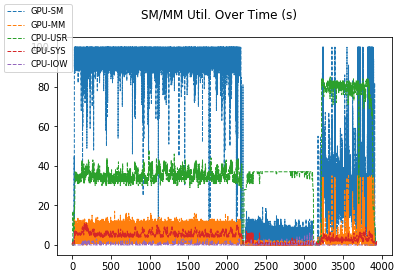

In [38]:
fig = plt.figure()
fig.suptitle('SM/MM Util. Over Time (s)')
plt.plot(t, sm, '--', linewidth=1, markersize=2, label='GPU-SM' )
plt.plot(t, mm, '--', linewidth=1, markersize=2, label='GPU-MM' )
plt.plot(timestamps, usr, '--', linewidth=1, markersize=2, label='CPU-USR' )
plt.plot(timestamps, sys, '--', linewidth=1, markersize=2, label='CPU-SYS' )
plt.plot(timestamps, iow, '--', linewidth=1, markersize=2, label='CPU-IOW' )
legend = fig.legend(loc='upper left', shadow=False, fontsize='small')

# Put a nicer background color on the legend.
#legend.get_frame().set_facecolor('C0')
plt.show()
fig.savefig('pbrun-sm.svg', width=1024, height=768)
fig.savefig('pbrun-sm.pdf', width=1024, height=768)